# Stats: Descriptive Statistics

*Purpose*: We will use *descriptive statistics* to make quantitative summaries of a dataset. Descriptive statistics provide a much more compact description than a visualization, and are important when a data consumer wants "just one number". However, there are many subtleties to working with descriptive statistics, which we'll discuss in this exercise.


## Setup


In [1]:
import grama as gr
import pandas as pd
DF = gr.Intention()
%matplotlib inline

# Statistics

A *statistic* is a numerical summary of a sample. Statistics are useful because they provide a useful summary about our data. A histogram gives us a rich summary of a datset: for example the departure delay time in the NYC flight data.


/home/zach/Bin/anaconda3/envs/evc/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
/home/zach/Bin/anaconda3/envs/evc/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log10
/home/zach/Bin/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_bin : Removed 208344 rows containing non-finite values.


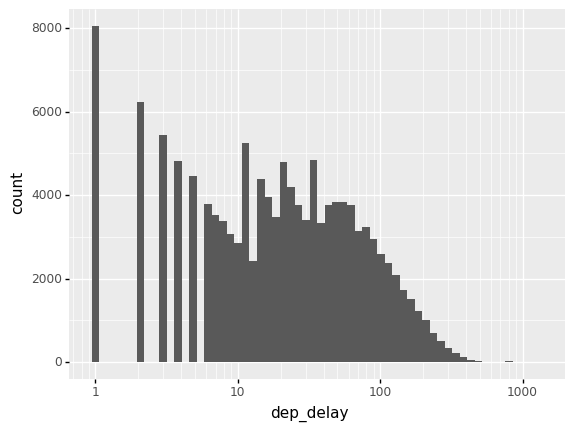

<ggplot: (8740351575104)>

In [2]:
## NOTE: Don't edit; run and inspect
from nycflights13 import flights as df_flights

(
    df_flights
    >> gr.ggplot(gr.aes("dep_delay"))
    + gr.geom_histogram(bins=60)
    + gr.scale_x_log10()
)

However, we might be interested in a few questions about these data:

- What is a *typical* value for the departure delay? (Location)
- How *variable* are departure delay times? (Spread)
- How much does departure delay *co-vary* with distance? (Dependence)

We can give quantitative answers to all these questions using statistics!


## Central Tendency

*Central tendency* is the idea of where data tend to be "located"---this concept is also called *location*. It is best thought of as the "center" of the data. The following graph illustrates central tendency, as operationalized by the *mean* and *median*.


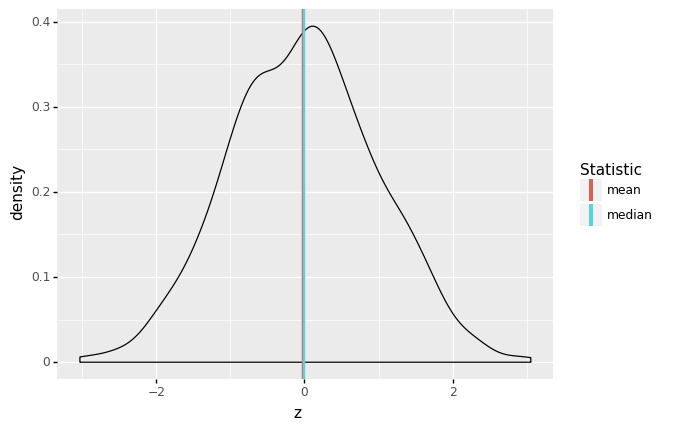

<ggplot: (8740349147483)>

In [3]:
## NOTE: No need to edit
# Generate data
df_standard = gr.df_make(z=gr.marg_mom("norm", mean=0, sd=1).r(1000))

# Visualize
(
    df_standard
    >> gr.ggplot(gr.aes("z"))
    + gr.geom_density()
    + gr.geom_vline(
        data=df_standard
        >> gr.tf_summarize(
            z_mean=gr.mean(DF.z),
            z_median=gr.median(DF.z),
        )
        >> gr.tf_pivot_longer(
            columns=["z_mean", "z_median"],
            names_to=[".value", "stat"],
            names_sep="_",
        ),
        mapping=gr.aes(xintercept="z", color="stat"),
        size=1,
    )
    + gr.scale_color_discrete(name="Statistic")
)

There are two primary measures of central tendency; the *mean* and *median*. The mean is the simple [arithmetic average](https://en.wikipedia.org/wiki/Arithmetic_mean): the sum of all values divided by the total number of values. The mean is denoted by $\overline{x}$ and defined by

$$\overline{X} = \frac{1}{n} \sum_{i=1}^n X_i,$$

where $n$ is the number of data points, and the $X_i$ are the individual values.

The [median](https://en.wikipedia.org/wiki/Median) is the value that separates half the data above and below. Weirdly, there's no standard symbol for the median, so we'll just denote it as $\text{Median}[X]$ to denote the median of a quantity $X$.

The median is a *robust* statistic, which is best illustrated by example. Consider the following two samples `v_base` and `v_outlier`. The sample `v_outlier` has an *outlier*, a value very different from the other values. Observe what value the mean and median take for these different samples.


In [4]:
## NOTE: No need to change this!
v_base = pd.Series([1, 2, 3, 4, 5])
v_outlier = v_base.copy()
v_outlier[-1] = 1e3

gr.df_make(
  mean_base=gr.mean(v_base),
  median_base=gr.median(v_base),

  mean_outlier=gr.mean(v_outlier),
  median_outlier=gr.median(v_outlier)
)


,mean_base,median_base,mean_outlier,median_outlier
0,3.0,3.0,169.166667,3.5


Note that for `v_outlier` the mean is greatly increased, but the median is only slightly changed. It is in this sense that the median is *robust*---it is robust to outliers. When one has a dataset with outliers, the median is usually a better measure of central tendency [1].

It can be useful to recognize when the mean and median agree or disagree with each other. For instance, with the flights data we see strong disagreement between the `mean` and `median` of `dep_delay`.


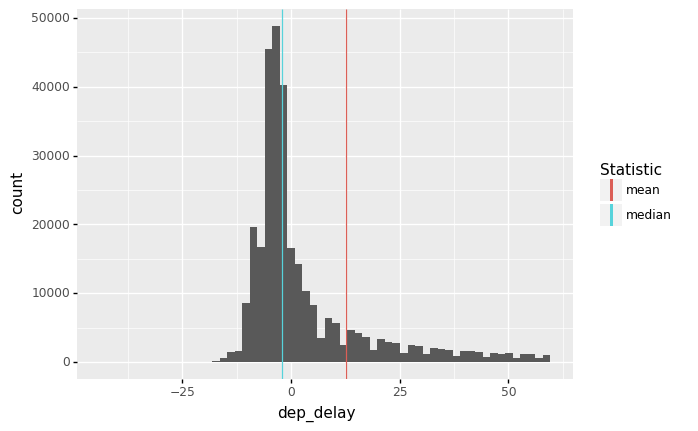

<ggplot: (8740349109261)>

In [5]:
(
    df_flights
    >> gr.tf_filter(DF.dep_delay < 60)
    >> gr.ggplot(gr.aes("dep_delay"))
    + gr.geom_histogram(bins=60)
    + gr.geom_vline(
        data=df_flights
        >> gr.tf_summarize(
            dep_delayXmean=gr.mean(DF.dep_delay),
            dep_delayXmedian=gr.median(DF.dep_delay),
        )
        >> gr.tf_pivot_longer(
            columns=["dep_delayXmean", "dep_delayXmedian"],
            names_to=[".value", "stat"],
            names_sep="X",
        ),
        mapping=gr.aes(xintercept="dep_delay", color="stat"),
    )
    + gr.scale_color_discrete(name="Statistic")
)

The median is in the bulk of the negative values, while the mean is pulled higher by the long right tail of the distribution.


### __q1__ Compare conclusions from mean and median

The following code computes the mean and median `dep_delay` for each carrier, and sorts based on mean. Duplicate the code, and sort by median instead. Answer the questions under *observations* below.


In [6]:
## NOTE: No need to edit; adapt this code to sort by median
(
    df_flights
    >> gr.tf_group_by(DF.carrier)
    >> gr.tf_summarize(
        mean=gr.mean(DF.dep_delay),
        median=gr.median(DF.dep_delay),
    )
    >> gr.tf_ungroup()
    >> gr.tf_arrange(gr.desc(DF["mean"]))
    >> gr.tf_head(5)
)

,carrier,mean,median
0,F9,20.215543,0.5
1,EV,19.955390,-1.0
2,YV,18.996330,-2.0
3,FL,18.726075,1.0
4,WN,17.711744,1.0


In [7]:
## NOTE: No need to edit; adapt this code to sort by median
(
    df_flights
    >> gr.tf_group_by(DF.carrier)
    >> gr.tf_summarize(
        mean=gr.mean(DF.dep_delay),
        median=gr.median(DF.dep_delay),
    )
    >> gr.tf_ungroup()
    >> gr.tf_arrange(gr.desc(DF["median"]))
    >> gr.tf_head(5)
)

,carrier,mean,median
0,FL,18.726075,1.0
1,WN,17.711744,1.0
2,F9,20.215543,0.5
3,UA,12.106073,0.0
4,VX,12.869421,0.0


*Observations*

- Which carriers show up in the top 5 in both lists?
  - `F9`, `FL`, `WN`
- Which carriers show up in the top 5 for only *one* of the lists?
  - `EV` and `WN` (Mean); `UA` and `VX` (Median)
<!-- solution-end -->

## Aside: Some variable names are tricky...

There's an issue we'll start to run into as we start naming columns the same as builtin functions. For instance, the following code will throw an error:


In [8]:
## TODO: Uncomment the code below and run
## NOTE: This will throw a huge, scary error!
# (
#     df_flights
#     >> gr.tf_summarize(
#         ## Here we assign a new column with the name `mean`
#         mean=gr.mean(DF.dep_delay)
#     )
#     >> gr.tf_mutate(
#         ## Here we attempt to access that `mean` column, but it goes wrong....
#         mean2x=DF.mean * 2
#     )
# )


The issue here is a bit technical, but it boils down to the fact that `mean` is now a column of the DataFrame, but also a *method* that we can call as a function `df.mean()`.

There's a way around this issue, which is to access the column through bracket notation `df["column"]` rather than dot notation `df.column`. This will correctly access the column `mean` rather than the method `mean()`.


### __q2__ Fix this code

Use bracket `[]` notation to access the `"mean"` column and fix the code below.


In [9]:
## TASK: Use bracket [] notation to fix the following code
(
    df_flights
    >> gr.tf_summarize(mean=gr.mean(DF.dep_delay))
    >> gr.tf_mutate(

        mean2x=DF["mean"] * 2
    )
)

,mean,mean2x
0,12.63907,25.278141


## Multi-modality

It may not seem like it, but we're actually *making an assumption* when we use the mean (or median) as a typical value. Imagine we had the following data:


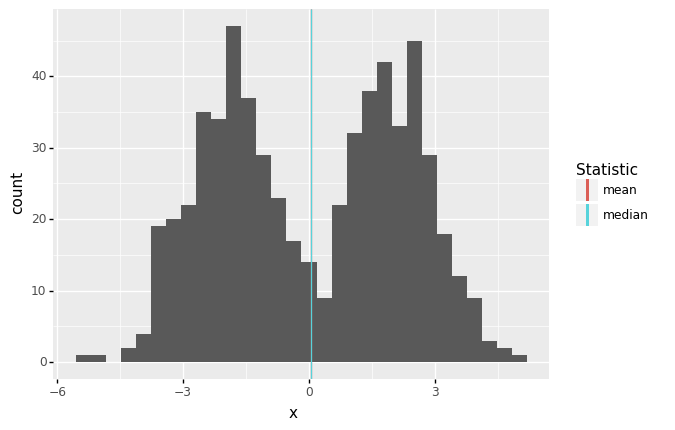

<ggplot: (8740348897220)>

In [10]:
## NOTE: No need to edit
df_bimodal = (
    gr.df_make(x=gr.marg_mom("norm", mean=-2, sd=1).r(300))
    >> gr.tf_bind_rows(gr.df_make(x=gr.marg_mom("norm", mean=+2, sd=1).r(300)))
)

(
    df_bimodal
    >> gr.ggplot(gr.aes("x"))
    + gr.geom_histogram(bins=30)
    + gr.geom_vline(
        data=df_bimodal
        >> gr.tf_summarize(
            x_mean=gr.mean(DF.x),
            x_median=gr.median(DF.x),
        )
        >> gr.tf_pivot_longer(
            columns=["x_mean", "x_median"],
            names_to=[".value", "stat"],
            names_sep="_",
        ),
        mapping=gr.aes(xintercept="x", color="stat"),
    )
    + gr.scale_color_discrete(name="Statistic")
)


Here the mean and median are both close to zero, but *zero is an atypical number*! This is partly why we don't *only* compute descriptive statistics, but also do a deeper dive into our data. Here, we should probably refuse to give a single typical value; instead, it seems there might really be two populations showing up in the same dataset, so we can give two typical numbers, say `-2, +2`.


## Quantiles

Before we can talk about spread, we need to talk about *quantiles*. A [quantile](https://en.wikipedia.org/wiki/Quantile) is a value that separates a user-specified fraction of data (or a distribution). For instance, the median is the $50\%$ quantile; thus $\text{Median}[X] = Q_{0.5}[X]$. We can generalize this idea to talk about any quantile between $0\%$ and $100\%$.

The following graph visualizes the $25\%, 50\%, 75\%$ quantiles of a standard normal. Since these are the quarter-quantiles ($1/4, 2/4, 3/4$), these are often called the *quartiles*.


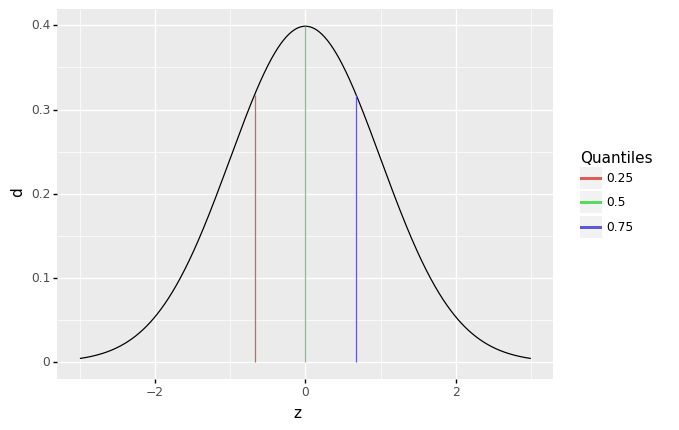

<ggplot: (8740348842990)>

In [11]:
## NOTE: No need to edit
mg_standard = gr.marg_mom("norm", mean=0, sd=1)

(
    gr.df_make(z=gr.linspace(-3, +3, 500))
    >> gr.tf_mutate(d=mg_standard.d(DF.z))
    
    >> gr.ggplot(gr.aes("z", "d"))
    + gr.geom_line()
    + gr.geom_segment(
        data=gr.df_make(p=[0.25, 0.50, 0.75])
        >> gr.tf_mutate(z=mg_standard.q(DF.p))
        >> gr.tf_mutate(d=mg_standard.d(DF.z)),
        mapping=gr.aes(xend="z", yend=0, color="factor(p)")
    )
    + gr.scale_color_discrete(name="Quantiles")
)

*Note*: This code makes use of *distributions* such as `mg_standard`; we'll learn more about that in a future exercise. For this exercise, we're focused more on taking statistics of datasets.

We'll use the quartiles to define the *interquartile range*. First, the `quant()` function computes quantiles of a sample. For example:


In [12]:
## NOTE: No need to change this! Run for an example
(
    df_flights
    >> gr.tf_summarize(
        dep_delay_25=gr.quant(DF.dep_delay, 0.25),
        dep_delay_50=gr.quant(DF.dep_delay, 0.50),
        dep_delay_75=gr.quant(DF.dep_delay, 0.75),
    )
)


,dep_delay_25,dep_delay_50,dep_delay_75
0,-5.0,-2.0,11.0


We provide to `gr.quant()` a column to analyze and a probability level. Remember: a *probability* is a value between $[0, 1]$, while a *quantile* is a value that probably has units, like minutes in the case of `dep_delay`.

Now we can define the interquartile range:

$$IQR[X] = Q_{0.75}[X] - Q_{0.25}[X],$$

where $Q_{p}[X]$ is the $p$-th quantile of a sample $X$.


### __q3__ Compute the IQR

Using the function `quantile`, compute the *interquartile range*; this is the difference between the $75%$ and $25%$ quantiles. Provide this as a column called `iqr`.


In [13]:
## TASK: Compute the IQR
df_standard_iqr = (
    df_standard
    >> gr.tf_summarize(

        iqr=gr.quant(DF.z, 0.75) - gr.quant(DF.z, 0.25),
    )
)

## NOTE: Use this to check your work
print(df_standard_iqr)

assert \
    "iqr" in df_standard_iqr.columns, \
    "df_standard_iqr does not have an `iqr` column"
assert \
    abs(df_standard_iqr.iqr.values[0] - gr.IQR(df_standard.z)) < 1e-3, \
    "Computed IQR is incorrect"

        iqr
0  1.368495


## Spread

*Spread* is the concept of how tightly or widely data are *spread out*. There are two primary measures of spread: the *standard deviation*, and the *interquartile range*.

The [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) (SD) is denoted by $s$ and defined by

$$s = \sqrt{ \frac{1}{n-1} \sum_{i=1}^n (X_i - \overline{X})^2 },$$

where $\overline{X}$ is the mean of the data. Note the factor of $n-1$ rather than $n$: This slippery idea is called [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). Note that $\sigma^2$ is called the *variance*.

By way of analogy, mean is to standard deviation as median is to IQR: The IQR is a robust measure of spread. Returning to our outlier example:


In [14]:
## NOTE: No need to change this!
v_base = pd.Series([1, 2, 3, 4, 5])
v_outlier = v_base.copy()
v_outlier[-1] = 1e3

gr.df_make(
  sd_base=gr.sd(v_base),
  IQR_base=gr.IQR(v_base),

  sd_outlier=gr.sd(v_outlier),
  IQR_outlier=gr.IQR(v_outlier)
)


,sd_base,IQR_base,sd_outlier,IQR_outlier
0,1.581139,2.0,407.026002,2.5


### __q4__ Compare conclusions from sd and IQR

Using the code from q2 as a starting point, compute the standard deviation (`sd()`) and interquartile range (`IQR()`), and rank the top five carriers, this time by sd and IQR. Answer the questions under *observations* below.


In [15]:
## TASK: Find top 5 sd and IQR carriers
print(
    df_flights
# task-begin
    ## TODO: Compute sd and IQR of dep_delay, take top 5 highest sd
# task-begin
    >> gr.tf_group_by(DF.carrier)
    >> gr.tf_summarize(
        sd=gr.sd(DF.dep_delay),
        IQR=gr.IQR(DF.dep_delay),
    )
    >> gr.tf_ungroup()
    >> gr.tf_arrange(gr.desc(DF["sd"]))
    >> gr.tf_head(5)
)

print(
    df_flights
# task-begin
    ## TODO: Compute sd and IQR of dep_delay, take top 5 highest IQR
# task-begin
    >> gr.tf_group_by(DF.carrier)
    >> gr.tf_summarize(
        sd=gr.sd(DF.dep_delay),
        IQR=gr.IQR(DF.dep_delay),
    )
    >> gr.tf_ungroup()
    >> gr.tf_arrange(gr.desc(DF["IQR"]))
    >> gr.tf_head(5)
)

  carrier         sd   IQR
0      HA  74.109901   6.0
1      F9  58.362648  22.0
2      FL  52.661600  21.0
3      YV  49.172266  30.0
4      EV  46.552354  30.0
  carrier         sd   IQR
0      EV  46.552354  30.0
1      YV  49.172266  30.0
2      9E  45.906038  23.0
3      F9  58.362648  22.0
4      FL  52.661600  21.0


*Observations*

- Which carriers show up in the top 5 in both lists?
  - `F9`, `FL`, `YV`, `EV`
- Which carriers show up in the top 5 for only *one* of the lists?
  - `HA` (sd); `9E` (IQR)
- Which carrier (among your top-ranked) has the largest difference between `sd` and `IQR`? What might this difference suggest?
  - `HA` has a huge standard deviation, but a relatively small `IQR`. It may be that `HA` has some extreme outlier delays that skew the `sd`.
<!-- solution-end -->

## Dependence

So far, we've talked about descriptive statistics to consider one variable at a time. To conclude, we'll talk about statistics to consider *dependence* between two variables in a dataset.

[Dependence](https://en.wikipedia.org/wiki/Correlation_and_dependence)---like location or spread---is a general idea of relation between two variables. For instance, when it comes to flights we'd expect trips between more distant airports to take longer. If we plot `distance` vs `air_time` in a scatterplot, we indeed see this dependence.


/home/zach/Bin/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_point : Removed 952 rows containing missing values.


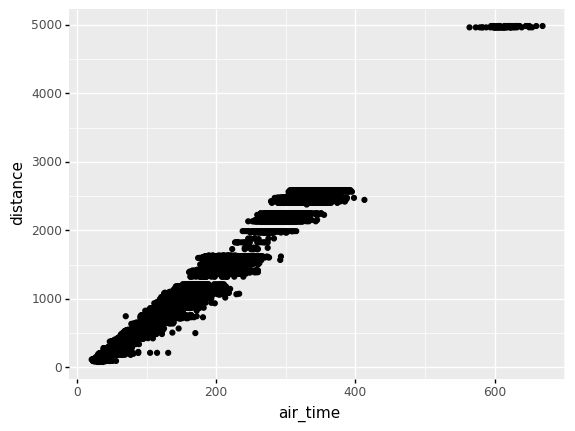

<ggplot: (8740348789390)>

In [16]:
## NOTE: No need to edit
(
    df_flights
    >> gr.tf_sample(frac=0.10) # Subsample the rows for speed
    
    >> gr.ggplot(gr.aes("air_time", "distance"))
    + gr.geom_point()
)

Two flavors of correlation help us make this idea quantitative: the *Pearson correlation* and *Spearman correlation*. Unlike our previous quantities for location and spread, these correlations are *dimensionless* (they have no units), and they are bounded between $[-1, +1]$.

The [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is often denoted by $r_{XY}$, and it specifies the variables being considered $X, Y$. It is defined by

$$r_{XY} = \frac{\sum_{i=1}^n (X_i - \overline{X}) (Y_i - \overline{Y})}{s_X s_Y}.$$

The [Spearman correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient) is often denoted by $\rho_{XY}$, and is actually defined in terms of the Pearson correlation $r_{XY}$, but with the ranks ($1$ to $n$) rather than the values $X_i, Y_i$.

For example, we might expect a strong correlation between the `air_time` and the `distance` between airports. The function `gr.corr()` can compute both Pearson and Spearman correlation.


In [17]:
## NOTE: No need to edit
(
    df_flights
    >> gr.tf_summarize(
        r=gr.corr(DF.air_time, DF.distance, nan_drop=True), # Default is pearson correlation
        rho=gr.corr(DF.air_time, DF.distance, method="spearman", nan_drop=True),
    )
)

,r,rho
0,0.99065,0.984445


As expected, we see a strong correlation between `air_time` and `distance` (according to both correlation metrics).

However, we wouldn't expect any relation between `air_time` and `month`.


In [18]:
## NOTE: No need to edit
(
    df_flights
    >> gr.tf_summarize(
        r=gr.corr(DF.air_time, DF.month, nan_drop=True), # Default is pearson correlation
        rho=gr.corr(DF.air_time, DF.month, method="spearman", nan_drop=True),
    )
)

,r,rho
0,0.010924,0.005213


In the case of a *perfect linear relationships* the Pearson correlation takes the value $+1$ (for a positive slope) or $-1$ for a negative slope.


### __q5__ Build your intuition for correlation

Compute the Pearson correlation between `x, y` below. Play with the `slope` and observe the change in the correlation. Answer the questions under *observations* below.


     r
0  1.0


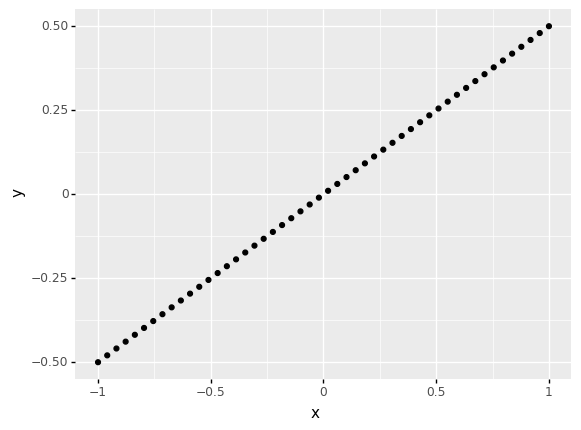

<ggplot: (8740348645789)>

In [19]:
## TASK: Vary the slope and re-run the code below
slope = 0.5

## NOTE: No need to edit beyond here
df_line = (
    gr.df_make(x=gr.linspace(-1, +1, 50))
    >> gr.tf_mutate(y=slope * DF.x)
)

print(
    df_line
    >> gr.tf_summarize(r=gr.corr(DF.x, DF.y))
)

(
    df_line
    >> gr.ggplot(gr.aes("x", "y"))
    + gr.geom_point()
)

**Observations**:

- For what values of `slope` is the correlation positive?
  - `slope` values greater than 0 have a positive correlation
- For what values of `slope` is the correlation negative?
  - `slope` values less than 0 have a negative correlation
- Is correlation a measure of the slope?
  - **No**; the correlation does not measure slope! Note that in this example, for any nonzero slope, we always find that $r = \pm 1$.


Note that this means *correlation is a measure of dependence*; it is **not** a measure of slope! It is better thought of as how *strong* the relationship between two variables is. A closer-to-zero correlation indicates a noisy relationship between variables, while a closer-to-one (in absolute value) indicates a more perfect, predictable relationship between the variables. For instance, the following code simulates data with different correlations, and facets the data based on the underlying correlation.


/home/zach/Bin/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


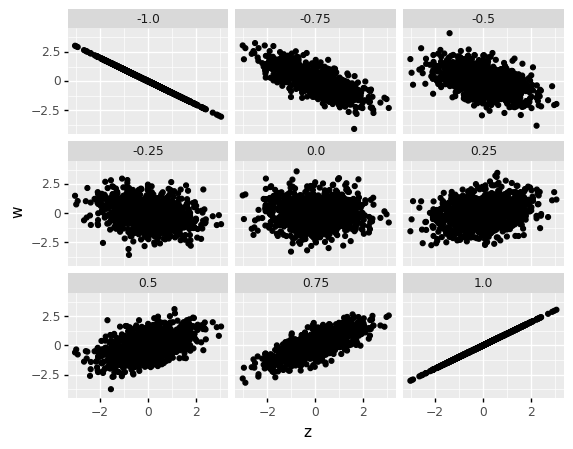

<ggplot: (8740348848144)>

In [20]:
## NOTE: No need to edit
# Generate data
df_correlated = gr.df_grid()
v_corr = [-1.0, -0.75, -0.5, -0.25, +0.0, +0.25, +0.5, +0.75, +1.0]
n = df_standard.shape[0]
for r in v_corr:
    df_correlated = (
        df_correlated
        >> gr.tf_bind_rows(
            df_standard
            >> gr.tf_mutate(
                # Use the conditional gaussian formula to generate correlated observations
                w=r * DF.z + mg_standard.r(n) * gr.sqrt(1 - r**2),
                r=r,
            )
        )
    )
# Visualize
(
    df_correlated
    >> gr.ggplot(gr.aes("z", "w"))
    + gr.geom_point()
    + gr.facet_wrap("r")
)

One of the primary differences between Pearson and Spearman is that Pearson is a *linear correlation*, while Spearman is a *nonlinear correlation*. 

For instance, the following data have a perfect *relationship*. However, the pearson correlation suggests the relationship is imperfect, while the spearman correlation correctly indicates a perfect relationship.


          r  rho
0  0.846169  1.0


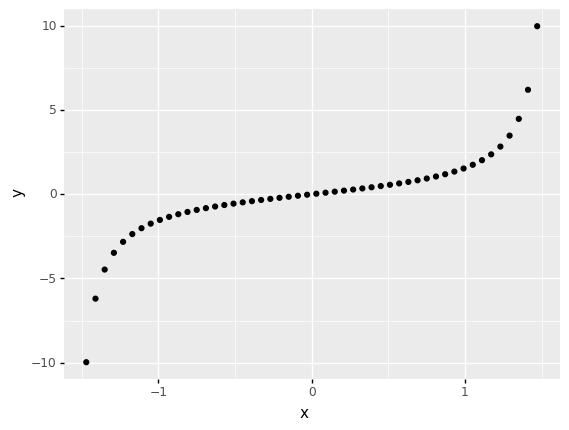

<ggplot: (8740348108870)>

In [21]:
## NOTE: No need to edit
df_monotone = (
    gr.df_make(x=gr.linspace(-3.14159/2 + 0.1, +3.14159/2 - 0.1, 50))
    >> gr.tf_mutate(y=gr.tan(DF.x))
)

print(
    df_monotone
    >> gr.tf_summarize(
        r=gr.corr(DF.x, DF.y),
        rho=gr.corr(DF.x, DF.y, method="spearman")
    )
)

(
    df_monotone
    >> gr.ggplot(gr.aes("x", "y"))
    + gr.geom_point()
)

One more note about functional relationships: Neither Pearson nor Spearman can pick up on arbitrary dependencies.


### __q6__ Make a prediction

Run the code chunk below and look at the visualization: Make a prediction about what you think the correlation will be. Then compute the Pearson correlation between `x, y` below.


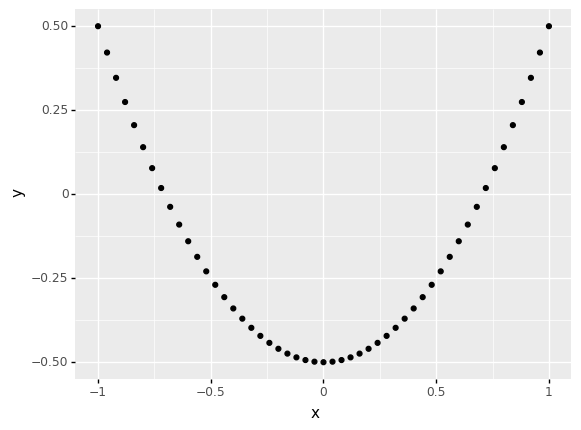

<ggplot: (8740348895157)>

In [22]:
## NOTE: Don't edit; run and inspect
df_quad = (
    gr.df_make(x=gr.linspace(-1, +1, 51))
    >> gr.tf_mutate(y=DF.x**2 - 0.5)
)

(
    df_quad
    >> gr.ggplot(gr.aes("x", "y"))
    + gr.geom_point()
)

In [23]:
## TASK: Compute the correlation between `x` and `y`
(
    df_quad
    >> gr.tf_summarize(
        r=gr.corr(DF.x, DF.y),
        rho=gr.corr(DF.x, DF.y, method="spearman"),
    )
)

,r,rho
0,8.326673e-17,0.006699


*Observations*

- Both correlations are near-zero


One last point about correlation: The mean is to Pearson correlation as the median is to Spearman correlation. The median and Spearman's rho are robust to outliers.


          r       rho
0  0.677177  0.904926


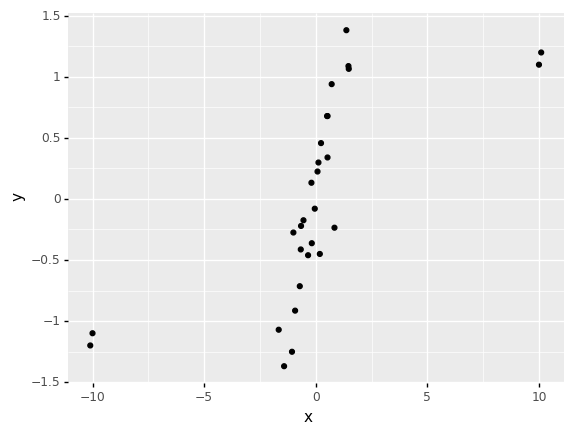

<ggplot: (8740346441301)>

In [24]:
## NOTE: No need to edit
df_corr_outliers = (
    gr.df_make(x=mg_standard.r(25))
    >> gr.tf_mutate(y=0.9 * DF.x + gr.sqrt(1-0.9**2) * mg_standard.r(25))
    >> gr.tf_bind_rows(gr.df_make(
        x=[-10.1, -10, 10, 10.1],
        y=[-1.2, -1.1, 1.1, 1.2],
    ))
)

print(
    df_corr_outliers
    >> gr.tf_summarize(
        r=gr.corr(DF.x, DF.y),
        rho=gr.corr(DF.x, DF.y, method="spearman"),
    )
)

(
    df_corr_outliers
    >> gr.ggplot(gr.aes("x", "y"))
    + gr.geom_point()
)

# Real Variability vs Error

As we've seen in this exercise, we are making **modeling assumptions** even when we do simple things like compute and use the mean. We should use multiple analyses---such as multiple statistics and visual inspection---to fully make sense of a dataset.

However, beyond simply treating the data as a set of numbers, we should also think critically about what the data *mean*, and what the sources of variability might be. Recall that sources of variability can be either [real or erroneous](https://zdelrosario.github.io/evc-course/exercises_solution/d08-e-stat02-source-solution.html); that is, the source either affect the physical system we are studying, or it can represent corrupted measurements. Most likely, the variability we see is a combination of both real and erroneous sources.

To close out this exercise, let's practice reasoning about sources of variability and choosing appropriate statistics for our analysis.


### __q7__ Reason about sources of variability

Choose a set of statistics to compute for the `dep_delay` column. Answer the questions under *observations* below. Note that you will need to compute multiple statistics *in response* to the questions below.


In [25]:
## TASK: Compute your statistics on `dep_delay`
(
    df_flights
    >> gr.tf_summarize(
        dep_delay_mean=gr.mean(DF.dep_delay),
        dep_delay_median=gr.median(DF.dep_delay),
        pr_early=gr.pr(DF.dep_delay < 0),
    )
)

,dep_delay_mean,dep_delay_median,pr_early
0,12.63907,-2.0,0.545095


*Observations*

- Is the variability in `dep_delay` most likely real or erroneous?
  - Aircraft departures are subject to all sorts of phenomena that could create delays, such as equipment failures, difficulties loading the plane, irate or uncooperative passengers, etc. I find it highly likely that a large fraction of the variability we see here is real.
- Compute the mean of `dep_delay`. Does this summary *on its own* suggest that departures could occur early?
  - No; the mean of `dep_delay` is positive (around `13` minutes), which on its own does not suggest that flights could ever depart early.
- Is it ever the case that a plane departs early? How typical is that occurrence?
  - Yes; the median delay is negative, which tells us that at least half the distribution is negative. In fact a little over half (`0.55`) the sample has a negative `dep_delay`.
<!-- solution-end -->

### __q8__ Select the most consistent airline

Take a look at the questions under *observations* below; compute the statistics necessary to answer the following questions.


In [26]:
## TASK: Compute your statistics on `dep_delay`
(
    df_flights
    >> gr.tf_group_by(DF.carrier)
    >> gr.tf_summarize(
        dep_delay_iqr=gr.IQR(DF.dep_delay),
        dep_delay_sd=gr.sd(DF.dep_delay),
        dep_delay_median=gr.median(DF.dep_delay),
        dep_delay_mean=gr.mean(DF.dep_delay),
        # n=gr.n(), # Future functionality
        n=gr.n(DF.index),
    )
    >> gr.tf_ungroup()
    >> gr.tf_arrange(DF.dep_delay_iqr)
)

,carrier,dep_delay_iqr,dep_delay_sd,dep_delay_median,dep_delay_mean,n
0,HA,6.0,74.109901,-4.0,4.900585,342
1,US,7.0,28.056334,-4.0,3.782418,20536
2,AA,10.0,37.354861,-3.0,8.586016,32729
3,AS,10.0,31.363032,-3.0,5.804775,714
4,DL,10.0,39.735052,-2.0,9.264505,48110
5,VX,12.0,44.815099,0.0,12.869421,5162
6,OO,13.0,43.065994,-6.0,12.586207,32
7,UA,15.0,35.716597,0.0,12.106073,58665
8,MQ,16.0,39.184566,-3.0,10.552041,26397
9,B6,17.0,38.503368,-1.0,13.022522,54635


*Observations*

- Which `carrier` is the most consistent, in terms of `dep_delay`?
  - It's a bit of a toss-up between `HA` (which has the smallest IQR) and `US` (which has the smallest standard deviation). However `HA` has relatively few observations in the dataset (`n=342` for `HA`, cf. `n=20536` for `US`), so it's less impressive that they are more consistent.
<!-- solution-end -->